# Support Vector Machine

In [2]:
import some_load_train_evaluate_functions as ml

from sklearn.svm import LinearSVC

In [2]:
path = '../KG/db.env'

driver = ml.connect_to_neo4j(path)

Connected to database successfully.


### Load Data

In [3]:
# Diabetes data

diabetes_df = ml.get_data_of_disease(driver, 'Diabetes')
diabetes_df

,Respondent_ID,Gender,Age,BMI,25-hydroxyvitamin D2 + D3 [nmol/L],A/G Ratio,Alpha-carotene [umol/L],Alpha-crypotoxanthin [umol/L],Alpha-tocopherol [umol/L],Basophils [%],...,Ferritin [ng/mL],Gamma Glutamyl Transferase [IU/L],Hemoglobin [g/dL],Insulin [pmol/L],LDL-Cholesterol(NIH2) [mmol/L],Lactate Dehydrogenase [IU/L],Transferrin Saturation [%],Transferrin receptor [nmol/L],Triglyceride [mmol/L],Diabetes
0,93703,0,2,17.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,93704,1,2,15.7,74.4,NaN,NaN,NaN,NaN,0.7,...,36.60,NaN,13.1,NaN,NaN,NaN,NaN,30.6,NaN,0
2,93705,0,66,31.7,89.9,1.517241,0.138,0.071,26.006,1.0,...,28.70,21.0,11.9,NaN,NaN,174.0,28.0,39.8,NaN,0
3,93706,1,18,21.5,53.8,1.629630,0.160,0.031,16.765,0.8,...,284.00,16.0,16.3,NaN,NaN,142.0,51.0,34.0,NaN,0
4,93707,1,13,18.1,58.2,1.857143,0.009,0.044,22.756,0.5,...,49.30,9.0,14.5,NaN,NaN,177.0,21.0,34.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8888,102952,0,70,20.0,82.7,1.846154,0.235,0.077,31.347,0.6,...,135.00,18.0,13.4,26.34,1.112,168.0,39.0,29.1,0.881,1
8889,102953,1,42,35.8,49.5,1.142857,0.106,0.080,21.873,0.6,...,120.00,28.0,15.5,NaN,NaN,136.0,20.0,28.6,NaN,0
8890,102954,0,41,26.1,50.5,1.500000,0.117,0.056,26.935,1.4,...,1.99,8.0,6.4,56.94,2.793,123.0,5.0,248.0,0.553,0
8891,102955,0,14,45.6,61.9,1.205882,0.031,0.079,17.856,0.9,...,11.40,16.0,11.4,NaN,NaN,158.0,5.0,57.7,NaN,0


### Training

In [5]:
svm_classifier = LinearSVC(random_state=42)

# Attributes and Labels

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

# Training

svm_classifier.fit(X_train, y_train)

# Accuracy scores

y_pred = svm_classifier.predict(X_val)

print('Training Accuracy: ',ml.accuracy_score(y_train, svm_classifier.predict(X_train)))

print('Testing Accuracy: ',ml.accuracy_score(y_val, y_pred))

Training Accuracy:  0.9360416080967107
Testing Accuracy:  0.9361821759910036


## Feature Selection

### Correlation Analysis

In [6]:
pos_corr, neg_corr = ml.get_correlated_features(diabetes_df,'Diabetes',pos=0.1,neg=-0.1)

corr_features = ['Gender'] + list(pos_corr.keys()[1:10]) + list(neg_corr.keys()[:10])
corr_features

['Gender',
 'Glycohemoglobin [%]',
 'Fasting Glucose [mmol/L]',
 'Age',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Insulin [pmol/L]',
 'Osmolality [mmol/Kg]',
 'Retinol [umol/L]',
 'Triglyceride [mmol/L]',
 'Total Lycopene [umol/L]',
 'Trans-lycopene [umol/L]',
 'Platelet count [1000 cells/uL]',
 'A/G Ratio',
 'Chloride [mmol/L]',
 'Platelet_WBC Ratio',
 'Direct HDL-Cholesterol [mmol/L]',
 'Albumin [g/dL]',
 'Alpha-crypotoxanthin [umol/L]',
 'Lymphocyte_C-Reactive Protein Ratio']

In [7]:
ml.evaluate_feature_set(corr_features, LinearSVC(random_state=42), X_train, y_train, X_val, y_val)


Train Accuracy: 0.933

Test Accuracy: 0.932

Precision: 0.895

Recall: 0.566

F1-Score: 0.694


### SelectFromModel

In [8]:
sfm_features = ml.select_from_model_features(LinearSVC(random_state=42),X,y)
sfm_features

['Age',
 'BMI',
 'Iron frozen [umol/L]',
 'UIBC [umol/L]',
 'Total Iron Binding Capacity [umol/L]',
 'Glycohemoglobin [%]',
 'Retinol [umol/L]',
 'Transferrin receptor [nmol/L]',
 'Blood Urea Nitrogen [mg/dL]',
 'Osmolality [mmol/Kg]',
 'Sodium [mmol/L]',
 'Total Cholesterol [mmol/L]',
 'Vitamin C [umol/L]',
 'Fasting Glucose [mmol/L]',
 'White blood cell count [1000 cells/uL]',
 'Lymphocyte [%]',
 'Segmented neutrophils [%]',
 'RBC count [million cells/uL]',
 'Hemoglobin [g/dL]',
 'Hematocrit [%]',
 'Mean cell volume [fL]',
 'Mean Cell Hgb Conc. [g/dL]',
 'Non_HDL Ratio',
 'Triglyceride_HDL Ratio']

In [9]:
sfm_features = list(sfm_features)

ml.evaluate_feature_set(sfm_features, LinearSVC(random_state=42), X_train, y_train, X_val, y_val)


Train Accuracy: 0.935

Test Accuracy: 0.935

Precision: 0.904

Recall: 0.583

F1-Score: 0.709


### SelectKBest

In [10]:
k_best_features = ml.select_k_best(X, y, n=30)
k_best_features[:30]

['Glycohemoglobin [%]',
 'Fasting Glucose [mmol/L]',
 'Age',
 'BMI',
 'Blood Urea Nitrogen [mg/dL]',
 'Osmolality [mmol/Kg]',
 'Retinol [umol/L]',
 'Lymphocyte [%]',
 'Insulin [pmol/L]',
 'Alpha-tocopherol [umol/L]',
 'Lymphocyte_C-Reactive Protein Ratio',
 'Segmented neutrophils [%]',
 'Neutrophil_Lymphocyte Ratio',
 'Alpha-crypotoxanthin [umol/L]',
 'Albumin [g/dL]',
 'Direct HDL-Cholesterol [mmol/L]',
 'Platelet_WBC Ratio',
 'C-Reactive Protein [mg/L]',
 'Creatinine [mg/dL]',
 'Ferritin [ng/mL]',
 'Chloride [mmol/L]',
 'Red cell distribution width [%]',
 'Triglyceride [mmol/L]',
 'A/G Ratio',
 'Platelet count [1000 cells/uL]',
 'Triglyceride_HDL Ratio',
 'Trans-lycopene [umol/L]',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'Total Lycopene [umol/L]',
 'Mean platelet volume [fL]']

In [11]:
ml.evaluate_feature_set(k_best_features[:30], LinearSVC(random_state=42), X_train, y_train, X_val, y_val)


Train Accuracy: 0.933

Test Accuracy: 0.934

Precision: 0.903

Recall: 0.579

F1-Score: 0.705


### Recursive Feature Elimination (RFE) 

In [12]:
rfe_features = ml.select_rfe_features(LinearSVC(random_state=42),X,y,n=30,step=0.5)
rfe_features[:30]

['Hemoglobin [g/dL]',
 'Mean cell volume [fL]',
 'Hematocrit [%]',
 'Total Cholesterol [mmol/L]',
 'Retinyl palmitate [umol/L]',
 'Retinol [umol/L]',
 'RBC count [million cells/uL]',
 'Transferrin receptor [nmol/L]',
 'Mean Cell Hgb Conc. [g/dL]',
 'Eosinophils [%]',
 'Segmented neutrophils [%]',
 'Monocyte [%]',
 'Lymphocyte [%]',
 'Osmolality [mmol/Kg]',
 'White blood cell count [1000 cells/uL]',
 'Fasting Glucose [mmol/L]',
 'Sodium [mmol/L]',
 'Blood Urea Nitrogen [mg/dL]',
 'Insulin [pmol/L]',
 'Vitamin C [umol/L]',
 'Triglyceride_HDL Ratio',
 'Age',
 'Iron frozen [umol/L]',
 'UIBC [umol/L]',
 'Total Iron Binding Capacity [umol/L]',
 'Glycohemoglobin [%]',
 'Triglyceride [mmol/L]',
 'Total Cholestrol_HDL Ratio',
 'BMI',
 'Non_HDL Ratio']

In [13]:
ml.evaluate_feature_set(rfe_features[:30], LinearSVC(random_state=42), X_train, y_train, X_val, y_val)


Train Accuracy: 0.935

Test Accuracy: 0.935

Precision: 0.907

Recall: 0.585

F1-Score: 0.711


### Lasso Regularization

In [14]:
# Uses lasso regularization in the LinearSVC model to give more weights to more important features

def svc_lasso_select(X_train, y_train, C=1):

    svc = LinearSVC(penalty='l1', C=C, dual=False, random_state=42)
    svc.fit(X_train, y_train)

    # Get feature importance coefficients from the SVM model
    feature_importance = svc.coef_[0]

    feature_importance_pairs = [(feature, importance) for feature, importance in zip(X.columns, feature_importance)]
    feature_importance_pairs.sort(key=lambda x: abs(x[1]), reverse=True)

    sorted_features = [feature for feature, _ in feature_importance_pairs]

    return sorted_features

In [15]:
l1_selected_features = svc_lasso_select(X_train, y_train, C=0.5)
l1_selected_features[:30]

['Fasting Glucose [mmol/L]',
 'Glycohemoglobin [%]',
 'Age',
 'Sodium [mmol/L]',
 'Osmolality [mmol/Kg]',
 'RBC count [million cells/uL]',
 'Non_HDL Ratio',
 'Hemoglobin [g/dL]',
 'Retinol [umol/L]',
 'Total Cholesterol [mmol/L]',
 'BMI',
 'White blood cell count [1000 cells/uL]',
 'LDL-Cholesterol(NIH2) [mmol/L]',
 'Mean cell volume [fL]',
 'Transferrin Saturation [%]',
 'Total Cholestrol_HDL Ratio',
 'Blood Urea Nitrogen [mg/dL]',
 'Mean cell hemoglobin [pg]',
 'Insulin [pmol/L]',
 'Alkaline Phosphatase [IU/L]',
 'Blood lead [umol/L]',
 'Mean Cell Hgb Conc. [g/dL]',
 'Vitamin C [umol/L]',
 'Transferrin receptor [nmol/L]',
 'Gamma Glutamyl Transferase [IU/L]',
 'Neutrophil_Lymphocyte Ratio',
 'Bicarbonate [mmol/L]',
 'Chloride [mmol/L]',
 'Hematocrit [%]',
 'A/G Ratio']

In [16]:
ml.evaluate_feature_set(l1_selected_features[:30], LinearSVC(random_state=42), X_train, y_train, X_val, y_val)


Train Accuracy: 0.937

Test Accuracy: 0.937

Precision: 0.906

Recall: 0.597

F1-Score: 0.720


### Relief F

In [17]:
relieff_features = ml.relief_feature_select(30,X,y)

In [18]:
relieff_features[:30]

['Age',
 'Glycohemoglobin [%]',
 'Respondent ID',
 'BMI',
 'Fasting Glucose [mmol/L]',
 'Segmented neutrophils [%]',
 'Hematocrit [%]',
 'Lymphocyte [%]',
 'Retinol [umol/L]',
 'Hemoglobin [g/dL]',
 'Total Cholesterol [mmol/L]',
 'Neutrophil_Lymphocyte Ratio',
 'Non_HDL Ratio',
 'Osmolality [mmol/Kg]',
 'Total Iron Binding Capacity [umol/L]',
 'Alpha-tocopherol [umol/L]',
 'Blood Urea Nitrogen [mg/dL]',
 'Potassium [mmol/L]',
 'Chloride [mmol/L]',
 'Mean cell volume [fL]',
 'Sodium [mmol/L]',
 'Total Protein [g/dL]',
 'Total Calcium [mg/dL]',
 'Total Cholestrol_HDL Ratio',
 'Gamma-tocopherol [umol/L]',
 'Lactate Dehydrogenase [IU/L]',
 'Phosphorus [mg/dL]',
 'A/G Ratio',
 'Uric Acid [mg/dL]',
 'Mean platelet volume [fL]']

In [20]:
ml.evaluate_feature_set(relieff_features[:30], LinearSVC(random_state=42), X_train, y_train, X_val, y_val)


Train Accuracy: 0.933

Test Accuracy: 0.932

Precision: 0.890

Recall: 0.568

F1-Score: 0.694


### Optimal no. of features

In [21]:
final_features = list(l1_selected_features) 

Finding optimal no. of features..: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 86/86 [17:57<00:00, 12.53s/it]



Maximum f1 = 0.7108 for 39 features


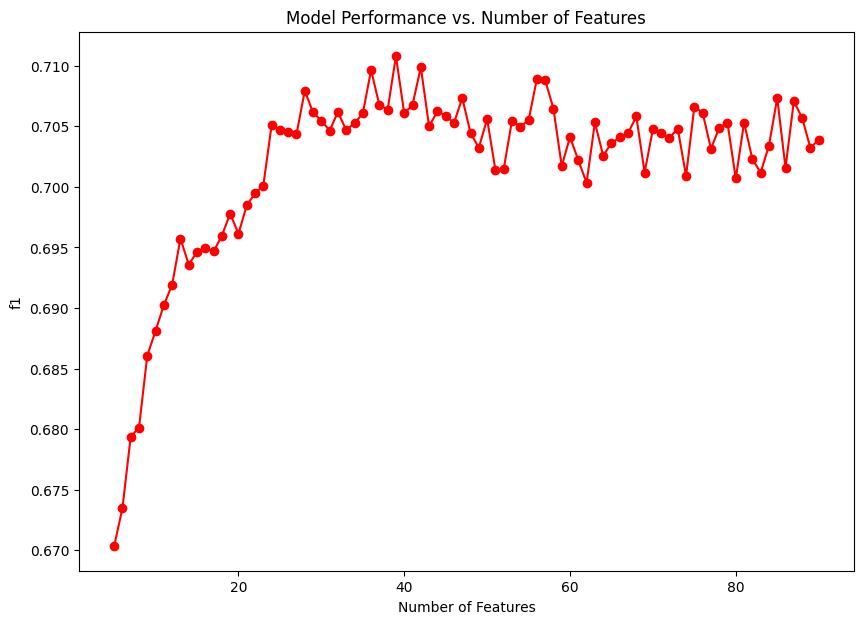

In [23]:
# Optimal no. of features

ml.plot_num_feature_performance(LinearSVC(random_state=42),  X, y, final_features, scoring='f1')

In [24]:
num_features = 39

selected = final_features[:num_features]
selected.append('Diabetes')

diabetes_df = diabetes_df[selected]

In [25]:
# Save feature set
    
with open('../Models/Diabetes/Feature Sets/SVM Features.pkl', 'wb') as f:
    ml.pickle.dump(selected, f)

## Preprocessing

### Zero Imputation

In [26]:
# Imputing null values with zeroes

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                        impute = True, scale=True,
                                                        imputer=ml.SimpleImputer(strategy='constant',fill_value=0),
                                                        random_state=42)

In [27]:
svm_classifier = LinearSVC(random_state=42)
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.924

Test Accuracy: 0.922

Precision: 0.860

Recall: 0.508

F1-Score: 0.639


### Mode Imputation

In [28]:
# Imputing with most frequent values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='most_frequent'),
                                                              random_state=42)

In [29]:
svm_classifier = LinearSVC(random_state=42)
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.934

Test Accuracy: 0.934

Precision: 0.898

Recall: 0.585

F1-Score: 0.708


### k-NN Imputation

In [31]:
# Imputing missing values with values from the k-nearest neighbors in the feature space

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.KNNImputer(n_neighbors=20),
                                                              random_state=42)

In [32]:
svm_classifier = LinearSVC(random_state=42)
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.930

Test Accuracy: 0.930

Precision: 0.868

Recall: 0.572

F1-Score: 0.690


### Multiple Imputation by Chained Equations (MICE)

In [33]:
# Imputes by looking at data from other columns and trying to estimate the best prediction for each missing value.

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.IterativeImputer(max_iter=20),
                                                              random_state=42)

In [34]:
svm_classifier = LinearSVC(random_state=42)
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.930

Test Accuracy: 0.929

Precision: 0.886

Recall: 0.545

F1-Score: 0.675


### Median Imputation

In [35]:
# Imputing with median values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='median'),
                                                              random_state=42)

In [36]:
svm_classifier = LinearSVC(random_state=42)
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.935

Test Accuracy: 0.934

Precision: 0.891

Recall: 0.589

F1-Score: 0.709


### Mean Imputation

In [37]:
# Splitting and Preprocessing data

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df, label = 'Diabetes',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

In [38]:
svm_classifier = LinearSVC(random_state=42)
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.936

Test Accuracy: 0.938

Precision: 0.907

Recall: 0.605

F1-Score: 0.726


### Dropping Null Values

In [39]:
# Drop null values
diabetes_df_na = diabetes_df.dropna()

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = diabetes_df_na, label = 'Diabetes',
                                                              impute = False, scale=True,
                                                              random_state=42)

In [40]:
svm_classifier = LinearSVC(random_state=42)
svm_classifier.fit(X_train, y_train)

ml.evaluate_model_metrics(svm_classifier,X_train,y_train,X_val,y_val)


Train Accuracy: 0.937

Test Accuracy: 0.934

Precision: 0.921

Recall: 0.759

F1-Score: 0.832


## Oversampling and Undersampling

### Random Oversampling

In [41]:
X_ros, y_ros = ml.random_over_sample(X_train, y_train)

svm_classifier = LinearSVC(random_state=42)
svm_classifier.fit(X_ros, y_ros)

ml.evaluate_model_metrics(svm_classifier,X_ros, y_ros,X_val, y_val)


Train Accuracy: 0.896

Test Accuracy: 0.892

Precision: 0.705

Recall: 0.854

F1-Score: 0.773


### SMOTE (Synthetic Minority Over-sampling Technique)

In [42]:
X_smote, y_smote = ml.smote_over_sample(X_train, y_train)

svm_classifier = LinearSVC(random_state=42)
svm_classifier.fit(X_smote, y_smote)

ml.evaluate_model_metrics(svm_classifier,X_smote, y_smote,X_val, y_val)


Train Accuracy: 0.904

Test Accuracy: 0.893

Precision: 0.712

Recall: 0.844

F1-Score: 0.772


### Random Undersampling

In [43]:
X_rus, y_rus = ml.random_under_sample(X_train, y_train)

svm_classifier = LinearSVC(random_state=42)
svm_classifier.fit(X_rus, y_rus)

ml.evaluate_model_metrics(svm_classifier,X_rus, y_rus,X_val, y_val)


Train Accuracy: 0.898

Test Accuracy: 0.874

Precision: 0.660

Recall: 0.859

F1-Score: 0.747


### Tomek Links

In [44]:
X_tomek, y_tomek = ml.tomek_links(X_train, y_train)

svm_classifier = LinearSVC(random_state=42)
svm_classifier.fit(X_tomek, y_tomek)

ml.evaluate_model_metrics(svm_classifier,X_tomek, y_tomek,X_val, y_val)


Train Accuracy: 0.936

Test Accuracy: 0.930

Precision: 0.894

Recall: 0.764

F1-Score: 0.824


### SMOTE + Tomek Links

In [45]:
X_smote_tomek, y_smote_tomek = ml.smote_tomek(X_train, y_train)

svm_classifier = LinearSVC(random_state=42)
svm_classifier.fit(X_smote_tomek, y_smote_tomek)

ml.evaluate_model_metrics(svm_classifier,X_smote_tomek, y_smote_tomek,X_val, y_val)


Train Accuracy: 0.904

Test Accuracy: 0.893

Precision: 0.712

Recall: 0.844

F1-Score: 0.772


In [46]:
# Model seems to perform better without oversampling or undersampling

## Hyperparameter Optimization 

### Grid Search

In [48]:
param_grid = {
    
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'loss': ['hinge', 'squared_hinge'],
    'penalty': ['l1', 'l2'],
    'dual': [False], 
    'class_weight': [None, 'balanced'] 

}

In [49]:
grid_best_params, svm_classifier_grid = ml.grid_search_optimize(LinearSVC(random_state=42), param_grid, X_train, 
                                                                y_train, cv=10,scoring='accuracy')

In [50]:
grid_best_params

{'C': 0.01,
 'class_weight': None,
 'dual': False,
 'loss': 'squared_hinge',
 'penalty': 'l2'}

In [51]:
ml.evaluate_model_metrics(svm_classifier_grid,X_train,y_train,X_val,y_val)


Train Accuracy: 0.937

Test Accuracy: 0.935

Precision: 0.966

Recall: 0.724

F1-Score: 0.828


### Random Search

In [52]:
rand_best_params, svm_classifier_rand = ml.random_search_optimize(LinearSVC(random_state=42),param_grid,n_iter=100,cv=5,
                                                               X_train=X_train, y_train=y_train,
                                                               scoring='accuracy')

In [53]:
rand_best_params

{'penalty': 'l2',
 'loss': 'squared_hinge',
 'dual': False,
 'class_weight': None,
 'C': 0.01}

In [54]:
ml.evaluate_model_metrics(svm_classifier_rand,X_train,y_train,X_val,y_val)


Train Accuracy: 0.937

Test Accuracy: 0.935

Precision: 0.966

Recall: 0.724

F1-Score: 0.828


### Optuna

In [55]:
def objective(trial):

    C = trial.suggest_loguniform('C', 1e-5, 1e3)
    loss = trial.suggest_categorical('loss', ['hinge', 'squared_hinge'])
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])
    dual = False
    
    if penalty == 'l1' or penalty == 'l2' and loss == 'hinge':
        raise ml.optuna.TrialPruned()

    model = LinearSVC(C=C, loss=loss, penalty=penalty, class_weight=class_weight, dual=dual, random_state=42)
            
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = ml.accuracy_score(y_test, y_pred)

    return accuracy

In [56]:
best_trial , svm_classifier_opt = ml.optuna_optimize(objective, LinearSVC, n_trials=150)

In [57]:
best_trial

{'C': 0.05157462051502034,
 'loss': 'squared_hinge',
 'penalty': 'l2',
 'class_weight': None}

In [58]:
svm_classifier_opt.fit(X_train,y_train)

ml.evaluate_model_metrics(svm_classifier_opt,X_train,y_train,X_val,y_val)


Train Accuracy: 0.939

Test Accuracy: 0.934

Precision: 0.926

Recall: 0.754

F1-Score: 0.831


## Evaluation on Test Set


Train Accuracy: 0.939

Test Accuracy: 0.944

Precision: 0.959

Recall: 0.754

F1-Score: 0.844

Confusion Matrix:

[[731   6]
 [ 46 141]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.94      0.99      0.97       737
     Class 1       0.96      0.75      0.84       187

    accuracy                           0.94       924
   macro avg       0.95      0.87      0.90       924
weighted avg       0.94      0.94      0.94       924


ROC-AUC Curve:


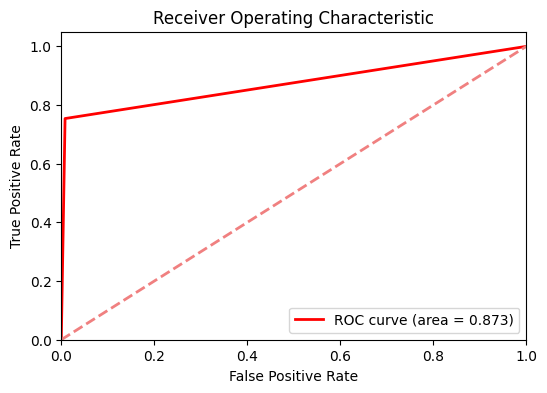

In [59]:
# After evaluating on the validation set, we evaluate and finalize on the test set

ml.evaluate_model_metrics(svm_classifier_opt, X_train, y_train, X_test, y_test, verbose=6)

## Cross Validation

### K-fold

In [60]:
ml.k_cross_validate(LinearSVC(random_state=42),X_train, y_train, cv=10,scoring='accuracy')


accuracy scores: [0.91891892 0.92432432 0.92972973 0.95675676 0.9027027  0.93513514
 0.91351351 0.93513514 0.95108696 0.92391304]

Mean accuracy score:  0.9291216216216217

Standard deviation:  0.015539246834611248


In [61]:
ml.k_cross_validate(LinearSVC(**svm_classifier_grid.get_params()),X_train, y_train, cv=10,scoring='accuracy')


accuracy scores: [0.90810811 0.92432432 0.93513514 0.97297297 0.91351351 0.94054054
 0.9027027  0.94594595 0.97282609 0.93478261]

Mean accuracy score:  0.9350851938895417

Standard deviation:  0.023162884553480416


In [62]:
ml.k_cross_validate(LinearSVC(**svm_classifier_rand.get_params()),X_train, y_train, cv=10,scoring='accuracy')


accuracy scores: [0.90810811 0.92432432 0.93513514 0.97297297 0.91351351 0.94054054
 0.9027027  0.94594595 0.97282609 0.93478261]

Mean accuracy score:  0.9350851938895417

Standard deviation:  0.023162884553480416


In [63]:
ml.k_cross_validate(LinearSVC(**svm_classifier_opt.get_params()),X_train, y_train, cv=10,scoring='accuracy')


accuracy scores: [0.91351351 0.92972973 0.92432432 0.96216216 0.9027027  0.94054054
 0.91351351 0.93513514 0.96195652 0.92934783]

Mean accuracy score:  0.931292596944771

Standard deviation:  0.01870254282181396


### Stratified K-fold

In [64]:
ml.stratified_k_cross_validate(LinearSVC(random_state=42),X_train, y_train, n_splits=10)


Average Accuracy: 0.9323678025851938

Average Precision: 0.9184027233735244

Average Recall: 0.7466936572199729

Average F1-Score: 0.8204768523804866


In [65]:
ml.stratified_k_cross_validate(LinearSVC(**svm_classifier_grid.get_params()),X_train, y_train, n_splits=10)


Average Accuracy: 0.932376615746181

Average Precision: 0.9578445621757634

Average Recall: 0.7101889338731444

Average F1-Score: 0.8126218896849988


In [66]:
ml.stratified_k_cross_validate(LinearSVC(**svm_classifier_rand.get_params()),X_train, y_train, n_splits=10)


Average Accuracy: 0.932376615746181

Average Precision: 0.9578445621757634

Average Recall: 0.7101889338731444

Average F1-Score: 0.8126218896849988


In [67]:
ml.stratified_k_cross_validate(LinearSVC(**svm_classifier_opt.get_params()),X_train, y_train, n_splits=10)


Average Accuracy: 0.9339952996474736

Average Precision: 0.9372558915870929

Average Recall: 0.736302294197031

Average F1-Score: 0.8219749252466363


### Save Model

In [68]:
final_svm_estimator = svm_classifier_opt

In [69]:
# Saving the model

ml.save_model(final_svm_estimator, "../Models/Diabetes/SVM.pkl")

Overwrite File? [y/n]: y
Saved Model


## Prediction

In [70]:
# Predicting on perturbed values

ml.predict_on_modified_instance(final_svm_estimator, X_test.iloc[0], y_test.iloc[0], 0.4)

Instance:
 [-0.23965133  0.08343459  0.43098526 -0.53977824 -0.91757442 -0.71586697
  0.59870785 -0.81699206 -0.87961504  0.52561492 -0.76952305 -0.25870994
  0.86069406 -0.10530833 -0.35078086  0.31577927 -0.75708332 -0.19998337
 -0.50214831 -0.60769327 -0.21433724 -0.2659618   0.86166844 -0.54900705
 -0.22729524 -0.54399921  0.15286896 -0.48539815 -0.78864439 -1.13909597
 -0.66948429 -0.41077715  0.13469137 -0.30155613 -0.41407201  0.04567121
  0.42060515  0.55940779 -0.32078214]

Expected Class:  0.0

 Modified Instance:
 [-0.23965133  0.16430908  0.34803841 -0.41437032 -1.12397577 -0.49070523
  0.67881198 -0.76045294 -0.95275034  0.5789763  -0.73798298 -0.20303913
  0.84836391  0.01890667 -0.26072837  0.25956227 -0.82749828 -0.19076235
 -0.37808322 -0.44779407 -0.39776378 -0.28496647  0.96418965 -0.25104857
 -0.29913675 -0.45560812  0.20249204 -0.41021644 -0.88686408 -1.21983878
 -0.74862011 -0.51254449  0.36650996 -0.21853879 -0.52105236 -0.19613331
  0.47974636  0.44256664 -0.329

In [71]:
ml.predict_on_modified_instance(final_svm_estimator, X_test.iloc[1], y_test.iloc[1], 0.3)

Instance:
 [-0.56871932 -0.91073796 -0.96987367  1.00435517  0.68565048 -0.9928193
 -0.36522065  0.08549795 -0.09949243 -0.37242152 -0.88928712 -0.49380827
 -0.54264627  1.58133097 -0.59673116 -0.3710447   0.07392759  1.42790017
 -0.4993656  -0.65105216 -0.35494613  0.29434076  0.50619582 -0.00901693
 -0.54572787 -0.18166113 -1.91825883  0.26871348 -0.00430855  1.83823534
 -0.32893737  0.52478628  0.30948747  0.05945168 -0.15041101 -0.06316231
 -0.24868676 -0.49487922 -0.85562403]

Expected Class:  0.0

 Modified Instance:
 [-0.56871932 -0.98446589 -0.85345674  1.02390761  0.59930554 -0.90006516
 -0.44927502 -0.0573715   0.14518548 -0.40114511 -1.03473448 -0.22924343
 -0.48295007  1.47183503 -0.56129653 -0.65967903  0.09283997  1.38181435
 -0.33739484 -0.46895147 -0.48124653  0.12269895  0.49272587  0.11855484
 -0.66636268 -0.18274028 -2.05511956  0.44596343  0.111217    1.84265034
 -0.25481126  0.56799902  0.26318581  0.26846276 -0.35727669 -0.06049572
 -0.32863463 -0.30063263 -1.0405